By <a href="https://nkelber.com">Nathan Kelber</a> and Ted Lawless <br />
For questions/comments/improvements, email nathan.kelber@ithaka.org.
____

# Explore the metadata for a JSTOR and/or Portico dataset

**Difficulty:** Beginner

**Programming Knowledge Required:** 
This notebook can be run on a JSTOR/Portico [non-consumptive](./key-terms.ipynb#non-consumptive) [JSON Lines (.jsonl)](./key-terms.ipynb#jsonl) [dataset](./key-terms.ipynb#dataset) with little to no knowledge of [Python](./key-terms.ipynb#python). To have a full understanding of the code used in this [notebook](./key-terms.ipynb#jupyter-notebook), we recommend learning:
* [Python Basics](https://automatetheboringstuff.com/2e/chapter1/)
* [Flow Control](https://automatetheboringstuff.com/2e/chapter2/)
* [Functions](https://automatetheboringstuff.com/2e/chapter3/)
* [Lists](https://automatetheboringstuff.com/2e/chapter4/)
* [Dictionaries](https://automatetheboringstuff.com/2e/chapter5/)

A familiarity with [Pandas](./key-terms.ipynb#pandas) is helpful but not required.

**Completion time:** 20 minutes

**Data Format:** [JSTOR](./key-terms.ipynb#jstor) and/or [Portico](./key-terms.ipynb#portico) [non-consumptive](./key-terms.ipynb#non-consumptive) [JSON Lines (.jsonl)](./key-terms.ipynb#jsonl)

**Libraries Used:**
* [json](./key-terms.ipynb#json-python-library) to convert our dataset from json lines format to a Python list
* [Pandas](./key-terms.ipynb#pandas) to help visualize the metadata

**Description of methods in this notebook:**
This [notebook](./key-terms.ipynb#jupyter-notebook) shows how to explore the [metadata](./key-terms.ipynb#metadata) of your [JSTOR](./key-terms.ipynb#jstor) and/or [Portico](./key-terms.ipynb#portico) [dataset](./key-terms.ipynb#dataset) using [Python](./key-terms.ipynb#python). The following processes are described:

* Manually or automatically importing your [JSTOR](./key-terms.ipynb#jstor) and/or [Portico](./key-terms.ipynb#portico) [dataset](./key-terms.ipynb#dataset)
* Converting your [JSTOR](./key-terms.ipynb#jstor) and/or [Portico](./key-terms.ipynb#portico) [dataset](./key-terms.ipynb#dataset) into a Python list
* Using the `.get` method to retrieve bibliographic metadata
* Checking if an item is in your [dataset](./key-terms.ipynb#dataset) against the dataset metadata
* Turning your [dataset](./key-terms.ipynb#dataset) into a [Pandas](./key-terms.ipynb#pandas) dataframe
* Filtering out [dataset](./key-terms.ipynb#dataset) materials like journal front matter, back matter, notes, etc.
* Visualizing the contents of your [Pandas](./key-terms.ipynb#pandas) dataframe by decade
____

## Importing your dataset

You have two options for bringing your dataset into the local environment:

1. Manually download and upload your dataset
2. Use a dataset id to automatically upload a dataset

### Option one: Manually download and upload your dataset

You can download your dataset from the corpus builder in the link shown below. (You may also have a link to your dataset in your email.) If you wish, you can modify your dataset on your local machine before the next upload phase. This gives you some more flexibility than automatically pulling in your dataset using a dataset ID using option 2 below.

![The link for downloading your dataset](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/downloadDataset.png)

Once you have your dataset ready on your local machine, you can then upload your dataset into JupyterLab by clicking the upload button in the file pane on the left.

![The upload button in the file pane](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/uploadDataset.png)

Make sure to upload your dataset to the "datasets" folder. 

### Option Two: Use a Dataset ID to automatically upload a dataset

You'll use the tdm_client library to automatically upload your dataset. We import the `Dataset` module from the `tdm_client` library. The tdm_client library contains functions for connecting to the JSTOR server containing our [corpus](./key-terms.ipynb#corpus) [dataset](./key-terms.ipynb#dataset). To analyze your dataset, use the [dataset ID](./key-terms.ipynb/#dataset-ID) provided when you created your [dataset](./key-terms.ipynb/#dataset). A copy of your [dataset ID](./key-terms.ipynb/#dataset-ID) was sent to your email when you created your [corpus](./key-terms.ipynb#corpus). It should look like a long series of characters surrounded by dashes. 

In [1]:
#Importing your dataset with a dataset ID
import tdm_client
tdm_client.get_dataset("cord-19", "sampleJournalAnalysis") #Load the sample dataset, the full run of Shakespeare Quarterly from 1950-2013.

# Other discipline datasets:

#Archaeology
# American Journal of Archaeology (1897-2020) (02b8c5c7-64bd-efe3-01d8-88c9efe7d17c)

#English
# Negro American Literature Forum (1967-1976) + Black American Literature Forum (1976-1991) + African American Review (1992-2016) (b4668c50-a970-c4d7-eb2c-bb6d04313542)
# Shakespeare Quarterly (1950-2013) (f6ae29d4-3a70-36ee-d601-20a8c0311273)
# ELH (1934-2014) (4999901a-fa17-31da-cfe5-2abf3a429df7)
# College English (1939-2016) (a161f384-720b-b6bf-a0cc-4d7d3b857e1c)
# PMLA (1889-2014) (1aea53b9-26d5-fe54-e35c-8259156ce6cd)

#History
# Past & Present (1952-2014)(5e117960-e384-b705-b143-5a667fe614f0)
# English Historical Review (1886-2014) (1d9ebc39-f4ac-ce2d-465a-3318f3ad9bad) *This dataset is downsampled to 25000 articles

#Philosophy

#Anthropology

#Law

#Art

#Classics
#Classical Quarterly (1907-2014) (82014740-8ed9-3c34-5716-d0879b8317f6)

#Sciences
# Covid-19 Open Research Dataset (cord-19) (Commercial Use Subset, (includes PMC content) -- 9118 full text (new: 128), 183Mb)
# See https://pages.semanticscholar.org/coronavirus-research for more information on this dataset

'datasets/sampleJournalAnalysis.jsonl'

Before we can begin working with our [dataset](./key-terms.ipynb#dataset), we need to convert the [JSON lines](./key-terms.ipynb#jsonl) file format into [Python](./key-terms.ipynb#python) so we can work with it. Remember that each line of our [JSON lines](./key-terms.ipynb#jsonl) file represents a single text, whether that is a journal article, book, or something else. We will create a [Python](./key-terms.ipynb#python) list that contains every document. Within each list item for each document, we will use a [Python dictionary](./key-terms.ipynb#python-dictionary) of [key/value pairs](./key-terms.ipynb#key-value-pair) to store information related to that document. 

Essentially we will have a [list](./key-terms.ipynb#python-list) of documents numbered, from zero to the last document. Each [list](./key-terms.ipynb#python-list) item then will be composed of a [dictionary](./key-terms.ipynb#python-dictionary) of [key/value pairs](./key-terms.ipynb#key-value-pair) that allows us to retrieve information from that particular document by number. The structure will look something like this:

![Structure of the corpus, a list of dictionaries](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CorpusView.png)

For each item in our list we will be able to use [key/value pairs](./key-terms.ipynb#key-value-pair) to get a **value** if we supply a **key**. We will call our [Python list](./key-terms.ipynb#python-list) variable `all_documents` since it will contain all of the documents in our [corpus](./key-terms.ipynb#corpus).

In [2]:
# Replace with your filename and be sure your file is in your datasets folder
file_name = 'sampleJournalAnalysis.jsonl' 

# Import the json module
import json
# Create an empty new list variable named `all_documents`
all_documents = [] 
# Temporarily open the file `filename` in the datasets/ folder
with open('./datasets/' + file_name) as dataset_file: 
    #for each line in the dataset file
    for line in dataset_file: 
        # Read each line into a Python dictionary.
        # Create a variable document that contains the line using json.loads to convert the json key/value pairs to a python dictionary
        document = json.loads(line) 
        # Append a new list item to `all_documents` containing the dictionary we created.
        all_documents.append(document) 

Now all of our documents have been converted from our original [JSON lines](./key-terms.ipynb#jsonl) file format (.jsonl) into a [python List](./key-terms.ipynb#python-list) variable named `all_documents`. Let's see what we can discover about our [corpus](./key-terms.ipynb#corpus) with a few simple methods.

First, we can determine how many texts are in our [dataset](./key-terms.ipynb#dataset) by using the `len()` function to get the size of `all_documents`. 

In [3]:
len(all_documents)

682

---
## Exploring the Metadata of a Single Article

We can also choose a single document and get [bibliographic metadata](./key-terms.ipynb#bibliographic-metadata) for that item. First we select a document from our list ```all_documents```. (In computer code, 0 is the first item, 1 is the second item, 2 is the third item, etc.) If we wanted to select the first item, we could use the `.get` method to retrieve the title for the item in our [list](./key-terms.ipynb#python-list) by writing `all_documents[0]`. 


In [13]:
# Define a new dictionary variable `chosenDocument` that is equal to the first item in our `all_documents` list
chosen_document = all_documents[40] # Select the eighth article in our list
chosen_document.get('title') #get the corresponding value for the key 'title'

'Targeting interferon response genes sensitizes aromatase inhibitor resistant breast cancer cells to estrogen-induced cell death'

We can also use the `.get` method to discover additional [bibliographic metadata](./key-terms.ipynb#bibliographic-metadata). Here are the most significant [bibliographic metadata](./key-terms.ipynb#bibliographic-metadata) items found with a [JSTOR](./key-terms.ipynb#jstor) item:
* `title` returns the title
* `creators` returns the authors in a Python list
* `isPartOf` returns the journal title
* `datePublished` returns the publication date
* `id` returns the stable URL for a JSTOR item
* `identifier` returns a Python list of dictionaries containing the ISSN #, OCLC #, and DOI #. 
* `volumeNumber` returns the journal volume number
* `pageCount` returns the number of pages in the print article
* `pagination` returns the page number range of the print article
* `pageStart` returns the first print page
* `pageEnd` returns the last print page
* `wordCount` returns the number of words in the article
* `docType` returns the type of document, usually `article` for journal article
* `url` returns the stable url for the document
* `provider` returns the source of the data, for JSTOR articles usually `jstor`
* `language` returns the language the article is written in

Let's try all these on our `chosenDocument`. 

In [16]:
print("Title: " + chosen_document.get('title'))
print("Authors: ", end='')
print(chosen_document.get('creators'))
print("Journal: " + chosen_document.get('isPartOf'))
print("Publication Date: " + chosen_document.get('datePublished'))
#print("Publisher: " + chosen_document.get('publisher'))
print("ID: " + chosen_document.get('id'))
print("ISSN, OCLC, DOI: ", end='')
print(chosen_document.get('identifier'))
#print("Volume Number: " + chosen_document.get('volumeNumber'))
print("Number of Pages: " + str(chosen_document.get('pageCount')))
print("Print Pagination: " + str(chosen_document.get('pagination')))
print("First Page: " + str(chosen_document.get('pageStart')))
print("Last Page: " + str(chosen_document.get('pageEnd')))
print("Number of words: " + str(chosen_document.get('wordCount')))
print("Document Type: " + chosen_document.get('docType'))
print("URL: " + chosen_document.get('url'))
print("Provider: " + chosen_document.get('provider'))
print("Language: " + str(chosen_document.get('language')))

Title: Targeting interferon response genes sensitizes aromatase inhibitor resistant breast cancer cells to estrogen-induced cell death
Authors: None
Journal: Breast Cancer Res
Publication Date: 2015-01-15
ID: cord19-0ce0b8bb68417974932e98c094ec93fbefc5193b
ISSN, OCLC, DOI: [{'name': 'pmc', 'value': 'PMC4336497'}, {'name': 'doi', 'value': '10.1186/s13058-014-0506-7'}, {'name': 'pubmed', 'value': '25588716'}]
Number of Pages: None
Print Pagination: None
First Page: None
Last Page: None
Number of words: None
Document Type: article
URL: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4336497
Provider: CORD-19
Language: None


We can see every [Python dictionary](./key-terms.ipynb#python-dictionary) **key** in the [metadata](./key-terms.ipynb#metadata) by using the `.keys` method. We could use this in conjunction with the `print()` function, but we will use the `list()` function here to make it a little neater for reading purposes.

In [17]:
#print(chosen_document.keys())# Uncomment the # in front of print to run this line of code
list(chosen_document.keys()) # Create a list of every Python dictionary key within `chosen_document`

['id',
 'docType',
 'provider',
 'title',
 'creator',
 'publicationYear',
 'isPartOf',
 'identifier',
 'abstract',
 'url',
 'fullText',
 'outputFormat',
 'datePublished',
 'unigramCount',
 'bigramCount',
 'trigramCount']

Of course, we could also list all the [Python dictionary](./key-terms.ipynb#python-dictionary) **values**, but the output will be quite long since it includes the word counts for every word that is in the article. (In fact, it includes the count for every unique [string](./key-terms.ipynb#string) in the article. We'll address the distinction in the [word frequencies](./key-terms.ipynb#word-frequency) [notebooks](./key-terms.ipynb#jupyter-notebook).) The word counts are found within `unigramCount` which we'll address in the word frequencies notebook. 

In [19]:
#list(chosen_document.values()) # Uncomment the # in front of list to run this line of code

---
## Checking if a particular document is in the corpus

Let's return to our larger [corpus](./key-terms.ipynb#corpus) `all_documents` to do some exploratory analysis. What if we wanted to check if a particular item was in the [corpus](./key-terms.ipynb#corpus)?

If we search out any journal article on jstor.org, the article description page will feature a stable url.

![A JSTOR description page](https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/jstorDescription.png)

We already saw above that the stable URL is stored in both the `id` and `url` dictionaries, so we can check our whole [corpus](./key-terms.ipynb#corpsu) for a particular article if we know the stable URL. From the image above, we can see the article in question has a stable URL of: https://www.jstor.org/stable/2871420

We can check whether the item above is in `all_documents` with the `in` or `not in` operators. First though, we need a list of all of the URLs in our corpus. We'll create a variable `list_of_urls` to hold all these values. Then we can check to see if our stable URL (http://www.jstor.org/stable/2871420) is in that list.

In [ ]:
# We create a blank list that will contain all of the urls in our dataset
list_of_urls = [] 
# For every document in our dataset
for document in all_documents:
    # Create a url_value variable to hold the URL for that document
    url_value = document.get('url') 
    # Append or add that URL to our Python list `list_of_urls`
    list_of_urls.append(url_value)
# Show the first five items in our list of urls
list(list_of_urls[0:5]) 

Now that we have a [list](./key-terms.ipynb#python-list) of all the URLs in our [corpus](./key-terms.ipynb#corpus) in the `list_of_urls` variable, let's use the `in` operator to discover whether our text is in the [corpus](./key-terms.ipynb#corpus). If the article is in our [dataset](./key-terms.ipynb#dataset), we will receive `true`. If the article is not our [dataset](./key-terms.ipynb#dataset), we will receive `false`.

*Note that the stable URL from jstor.org uses a secure address starting with "https://". Our dictionary values, however, use a standard address beginning with "http://".
* http**s**://
* http://

You'll need to remove the "s" to run this test since our `list_of_urls` are not secure addresses.

In [ ]:
'http://www.jstor.org/stable/2871420' in list_of_urls

Now we have a good idea of what [metadata](./key-terms.ipynb#metadata) is in our [corpus](./key-terms.ipynb#corpus) and how we might retrieve it. We were able to use the `in` operator above to check if a particular article was in the [corpus](./key-terms.ipynb#corpus) using the URL. Of course, we could also check to see if a particular journal, author, publisher, or DOI # was in our corpus using a similar method. 

We'll finish this [notebook](./key-terms.ipynb#jupyter-notebook) by taking a big picture look at the [corpus](./key-terms.ipynb#corpus). What largescale patterns exist in this [corpus](./key-terms.ipynb#corpus) over the decades. We'll use [Pandas](./key-terms.ipynb#pandas) to help with our analysis. If you would like to learn more about [Pandas](./key-terms.ipynb#pandas), we recommend the [Python Pandas tutorial at learndatasci.com](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/). For now, we will create a couple visualizations for demonstration purposes.

---
## Explore Corpus Metadata with Pandas

In [20]:
# Imports pandas and allows us to call it with the phrase pd
import pandas as pd

To use [Pandas](./key-terms.ipynb#pandas), we need to import it first. The `as pd` lets us use the shorthand `pd` when we want to call [Pandas](./key-terms.ipynb#pandas) instead writing out the entire word `pandas`. 

Now we can turn our [Python list](./key-terms.ipynb#python-list) `all_documents` into a [Pandas](./key-terms.ipynb#pandas) [dataframe](./key-terms.ipynb#pandas-dataframe). This will enable us to manipulate and view our data as a table or a graph. We will call our [dataframe](./key-terms.ipynb#pandas-dataframe) `df`.

In [21]:
df = pd.DataFrame(all_documents)

Let's see what our [corpus](./key-terms.ipynb#corpus) looks like in table form. We can use the `.head()` method to show us the first five rows of our data as a table.

In [22]:
df

,abstract,bigramCount,creator,datePublished,docType,fullText,id,identifier,isPartOf,outputFormat,provider,publicationYear,title,trigramCount,unigramCount,url
0,BACKGROUND: Severe acute respiratory syndrome ...,"{'ifn γ': 55, 's366 374': 21, 'of the': 20, 'i...","[Jun Huang, Yingnan Cao, Xianzhang Bu, Changyo...",2012-09-10,article,[Severe acute respiratory syndrome (SARS) is a...,cord19-4152ae12ac49d157a290281842bce9e9d16096a7,"[{'name': 'pmc', 'value': 'PMC3575293'}, {'nam...",BMC Immunol,"[unigram, bigram, trigram, fullText]",CORD-19,2012,Residue analysis of a CTL epitope of SARS-CoV ...,"{'of ifn γ': 16, 'sars cov s': 14, 'h 2 k': 13...","{'the': 172, 'and': 112, 'of': 112, 'to': 87, ...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1,New organisms and biological systems designed ...,"{'synthetic biology': 40, 'of the': 32, 'based...","[Harald König, Daniel Frank, Reinhard Heil, Ch...",2013-03-25,article,[Giving an unequivocal definition of synthetic...,cord19-0414c8763c6ec295be60d86698ec3a76e981e54f,"[{'name': 'pmc', 'value': 'PMC3580775'}, {'nam...",Curr Genomics,"[unigram, bigram, trigram, fullText]",CORD-19,2013,Send Orders of Reprints at bspsaif@emirates.ne...,"{'in e coli': 10, 'as well as': 9, 'and synthe...","{'of': 263, 'and': 262, 'the': 249, 'to': 207,...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
2,BACKGROUND: Anterior gradient homolog 2 (AGR2)...,"{'of the': 28, 'and the': 16, 'of agr2': 14, '...","[Jie Wu, Chi Wang, Xilan Li, Yanling Song, Wei...",2012-09-28,article,[Anterior gradient homolog 2 (AGR2) was identi...,cord19-a015401a1cdf151bd0bca060bd8eb96d6683a147,"[{'name': 'pmc', 'value': 'PMC3460915'}, {'nam...",PLoS One,"[unigram, bigram, trigram, fullText]",CORD-19,2012,"Identification, Characterization and Applicati...","{'agr2 gst beads': 7, 'flow cytometry analysis...","{'the': 239, 'of': 143, 'and': 113, 'to': 89, ...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
3,Theiler's virus is a neurotropic picornavirus ...,"{'rnase l': 118, 'of the': 58, 'of l': 36, 'in...","[Fré Dé, Ric Sorgeloos, Babal Kant Jha, Robert...",2013-06-27,article,[Control of infectious agents is a major chall...,cord19-5908982f4dbbfde0faabcfadc0988b8a19223411,"[{'name': 'pmc', 'value': 'PMC3694852'}, {'nam...",PLoS Pathog,"[unigram, bigram, trigram, fullText]",CORD-19,2013,Evasion of Antiviral Innate Immunity by Theile...,"{'l mutant viruses': 18, 'rnase l pathway': 15...","{'the': 310, 'l': 304, 'of': 245, 'in': 193, '...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
4,BACKGROUND: As designated points of entry (PoE...,"{'of the': 79, 'in the': 33, 'to the': 31, 'th...","[Hsiao-Hsuan Chiu, Jui-Wei Hsieh, Yi-Chun Wu, ...",2014-07-17,article,"[T aiwan, an island situated in the subtropica...",cord19-dba0cdf3fbecdba11207ba0d7da322fc2a83b798,"[{'name': 'pmc', 'value': 'PMC4104008'}, {'nam...",Glob Health Action,"[unigram, bigram, trigram, fullText]",CORD-19,2014,Building core capacities at the designated poi...,"{'of the ihr': 13, 'ihr poe program': 12, 'tia...","{'the': 550, 'and': 226, 'of': 212, 'to': 197,...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
5,Type I IFN production is one of the hallmarks ...,"{'of the': 55, 'et al': 52, 'p5 high': 30, 'in...","[Bernadette Van Den Hoogen, Sander Van Boheeme...",2014-08-25,article,"[Human metapneumovirus (HMPV), a paramyxovirus...",cord19-4a17cedf8c94b518c91dfa6719832894b5dd0417,"[{'name': 'pmc', 'value': 'PMC4103063'}, {'nam...",J Gen Virol,"[unigram, bigram, trigram, fullText]",CORD-19,2014,Excessive production and extreme editing of hu...,"{'vero 118 cells': 11, 'the presence of': 10, ...","{'the': 260, 'of': 190, 'in': 112, 'and': 111,...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
6,"To determine the prevalence, epidemiology and ...","{'hcov oc43': 74, 'of hcov': 42, 's and': 22, ...","[Q Hu, R Lu, K Peng, X Duan, Y Wang]",2014-07-02,article,[Coronaviruses are ubiquitous in the environme...,cord19-ff77d5ebc39274bb7729f2b5261bca574bdfd6a8,"[{'name':

Now we can see the first part of all the [metadata](./key-terms.ipynb#metadata) we have been discussing in table form. Much clearer! There's a lot of [metadata](./key-terms.ipynb#metadata) here so you will need to scroll right to see all the columns. Long items in this view are abbreviated with `...` to signify that they continue past what is shown. Let's use our new [Pandas](./key-terms.ipynb#pandas) [dataframe](./key-terms.ipynb#pandas-dataframe) to learn a little more about our [corpus](./key-terms.ipynb#corpus).

First, we may not be interested in every column so let's simplify our dataframe by dropping columns that may not be useful to us. We'll drop:

* docType
* identifier
* language
* outputFormat
* sourceCategory
* tdmCategory
* pageEnd
* pageStart
* pagination
* datePublished

In [23]:
df = df.drop(['docType', 'identifier', 'language', 'outputFormat', 'sourceCategory', 'tdmCategory', 'pageEnd', 'pageStart', 'pagination', 'datePublished'], axis=1) #drop each of these columns
df #display df

KeyError: "['language' 'sourceCategory' 'tdmCategory' 'pageEnd' 'pageStart'\n 'pagination'] not found in axis"

In [24]:
df = df.dropna(subset=['creators']) #drop all articles with no value under 'creators'
df #display df

KeyError: ['creators']

In [ ]:
df = df[df.title != 'Review Article'] #remove articles with title "Review Article"
df = df[df.title != 'Front Matter'] #remove articles with title "Front Matter"
df = df[df.title != 'Back Matter'] #remove articles with title "Back Matter"
df = df[df.wordCount > 3000] #remove articles with fewer than 3000 words
# Adjust this variable depending on your journal and how you define article by length
df #display df

---
## Sort Articles by Decade with Pandas

Notice above there is column labeled `publicationYear`. Let's figure out the full year range of our [corpus](./key-terms.ipynb#corpus). We can do this by using the `.min` and `.max` methods. We'll create a variable to store each and then print them out.

We can find the year range in our [Pandas](./key-terms.ipynb#pandas) [dataframe](./key-terms.ipynb#pandas-dataframe) by finding the minimum and maximum of `publicationYear`.

In [25]:
min_year = df['publicationYear'].min() #create variable `minYear` that is the minimum value from `publicationYear`
max_year = df['publicationYear'].max() #create variable `maxYear` that is the maximum value from `publicationYear`

print(str(min_year) + ' to ' + str(max_year)) #print a string showing "minYear to maxYear"

2003 to 2020


Now we know the full year range of our [dataset](./key-terms.ipynb#dataset). Let's see if we can identify any trends across the decades.

Since `decade` isn't a column in our [Pandas](./key-terms.ipynb#pandas) [dataframe](./key-terms.ipynb#pandas-dataframe), we'll need to create it. First though, we'll need to consider how to turn a date into a decade. Let's try an example.  To translate a year (1925) to a decade (1920), we need to subtract the final digit so it becomes a zero. Basically, we need a way to discover the final digit in each decade and then subtract it so the final digit of our date becomes a zero. Something like:

`1925 - 5 = 0`

We can find the value for the final digit in any particular case by using [modulo](./key-terms.ipynb#modulo) (which provides the remainder of a division). If we use `% 10` on a date, it should give us a remainder that is the ones digit.

In [ ]:
# What is the remainder of 1925 divided by 10?
1925 % 10 

The result will give us our ones digit. Now we subtract this calculation from our original date. The result gives us the decade number we are looking for.

In [ ]:
1925 - (1925 % 10)

We can translate this example to the whole [dataframe](./key-terms.ipynb#pandas-dataframe) using the following code. We'll create a new function `add_decade` that takes a `value` from the `publicationYear` column and translates it into a decade column.

In [26]:
# Create a function `add_decade` that takes an argument `value`
def add_decade(value): 
    # Create a variable `yr` that turns value from a string into an integer
    yr = int(value) 
    # Create a variable `decade` that subtracts the ones digit by using the modulo (%) operator
    decade = yr - ( yr % 10 ) 
    # Return the variable `decade` for the function `add_decade`
    return decade

df['decade'] = df['publicationYear'].apply(add_decade) 
# create a new column `decade` in our dataframe that is equal to 
# the column `publicationYear` after applying 
# the add_decade function we created

To see the new decade column we created in our data, let's use the `df.head()` method again to see how it changed the first 5 rows of the [dataframe](./key-terms.ipynb#pandas-dataframe). To see the decade column, you will need to scroll all the way to the right.

In [27]:
df.head()

,abstract,bigramCount,creator,datePublished,docType,fullText,id,identifier,isPartOf,outputFormat,provider,publicationYear,title,trigramCount,unigramCount,url,decade
0,BACKGROUND: Severe acute respiratory syndrome ...,"{'ifn γ': 55, 's366 374': 21, 'of the': 20, 'i...","[Jun Huang, Yingnan Cao, Xianzhang Bu, Changyo...",2012-09-10,article,[Severe acute respiratory syndrome (SARS) is a...,cord19-4152ae12ac49d157a290281842bce9e9d16096a7,"[{'name': 'pmc', 'value': 'PMC3575293'}, {'nam...",BMC Immunol,"[unigram, bigram, trigram, fullText]",CORD-19,2012,Residue analysis of a CTL epitope of SARS-CoV ...,"{'of ifn γ': 16, 'sars cov s': 14, 'h 2 k': 13...","{'the': 172, 'and': 112, 'of': 112, 'to': 87, ...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2010
1,New organisms and biological systems designed ...,"{'synthetic biology': 40, 'of the': 32, 'based...","[Harald König, Daniel Frank, Reinhard Heil, Ch...",2013-03-25,article,[Giving an unequivocal definition of synthetic...,cord19-0414c8763c6ec295be60d86698ec3a76e981e54f,"[{'name': 'pmc', 'value': 'PMC3580775'}, {'nam...",Curr Genomics,"[unigram, bigram, trigram, fullText]",CORD-19,2013,Send Orders of Reprints at bspsaif@emirates.ne...,"{'in e coli': 10, 'as well as': 9, 'and synthe...","{'of': 263, 'and': 262, 'the': 249, 'to': 207,...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2010
2,BACKGROUND: Anterior gradient homolog 2 (AGR2)...,"{'of the': 28, 'and the': 16, 'of agr2': 14, '...","[Jie Wu, Chi Wang, Xilan Li, Yanling Song, Wei...",2012-09-28,article,[Anterior gradient homolog 2 (AGR2) was identi...,cord19-a015401a1cdf151bd0bca060bd8eb96d6683a147,"[{'name': 'pmc', 'value': 'PMC3460915'}, {'nam...",PLoS One,"[unigram, bigram, trigram, fullText]",CORD-19,2012,"Identification, Characterization and Applicati...","{'agr2 gst beads': 7, 'flow cytometry analysis...","{'the': 239, 'of': 143, 'and': 113, 'to': 89, ...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2010
3,Theiler's virus is a neurotropic picornavirus ...,"{'rnase l': 118, 'of the': 58, 'of l': 36, 'in...","[Fré Dé, Ric Sorgeloos, Babal Kant Jha, Robert...",2013-06-27,article,[Control of infectious agents is a major chall...,cord19-5908982f4dbbfde0faabcfadc0988b8a19223411,"[{'name': 'pmc', 'value': 'PMC3694852'}, {'nam...",PLoS Pathog,"[unigram, bigram, trigram, fullText]",CORD-19,2013,Evasion of Antiviral Innate Immunity by Theile...,"{'l mutant viruses': 18, 'rnase l pathway': 15...","{'the': 310, 'l': 304, 'of': 245, 'in': 193, '...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,2010
4,BACKGROUND: As designated points of entry (PoE...,"{'of the': 79, 'in the': 33, 'to the': 31, 'th...","[Hsiao-Hsuan Chiu, Jui-Wei Hsieh, Yi-Chun Wu, ...",2014-07-17,article,"[T aiwan, an island situated in the subtropica...",cord19-dba0cdf3fbecdba11207ba0d7da322fc2a83b798,"[{'name': 'pmc', 'value': 'PMC4104008'}, {'nam...",Glob Health Action,"[unigram, bigram, trigram, fullText]",CORD-19,2014,Building core capacities at the designated poi...,"{'of the ihr': 13, 'ihr poe program': 12, 'tia...","{'the': 550, 'and': 226, 'of': 212, 'to': 197,...",https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,2010


For a final demonstration, we'll create two graphs of our [corpus](./key-terms.ipynb#corpus) using our new decade column. Let's look at the number of documents by decade first. 

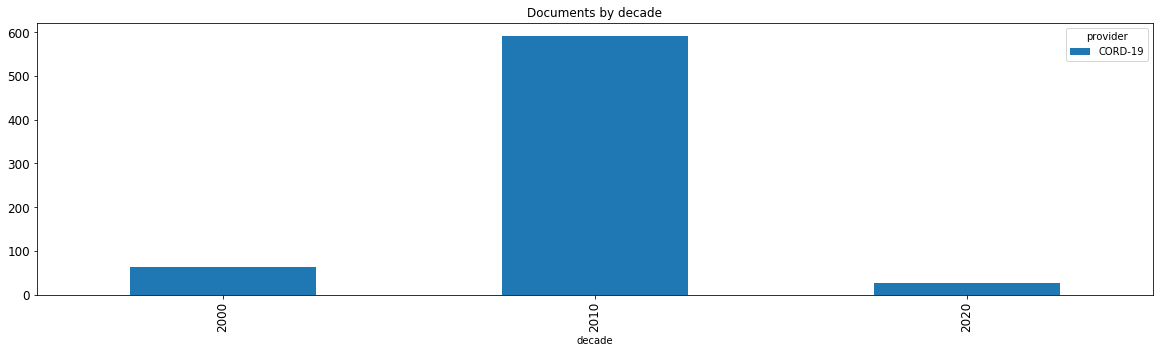

In [33]:
df.groupby(['decade', 'provider'])['id'].agg('count').unstack()\
    .plot.bar(title='Documents by decade', figsize=(20, 5), fontsize=12, stacked=True); ##There is a weird bug where this cell needs to be run twice.

And now let's look at the total page numbers by decade.

In [34]:
df.groupby(['decade', 'provider'])['pageCount'].agg('sum').unstack()\
    .plot.bar(title='Pages by decade', figsize=(20, 5), fontsize=12, stacked=True);

KeyError: 'Column not found: pageCount'

That concludes our look at [bibliographic metadata](./key-terms.ipynb#bibliographic-metadata). Next we'll examine [word frequency](./key-terms.ipynb#word-frequency). 
___

By <a href="https://nkelber.com">Nathan Kelber</a> and Ted Lawless <br />
For questions/comments/improvements, email nathan.kelber@ithaka.org.